## Análisis de los datos inciales

In [2]:
# Librerias necesarias 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import joblib

In [3]:
# Se cargan los datos preprocesados 
df = joblib.load('Data_final\\df.pkl')

### Analisis univariado 

In [4]:
df.head(3)

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico,Numero_Comorbilidades
0,18686469,1,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1.579219e+06,40,61,Diagnostico Pendiente,0.0
1,18686469,1,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,4.428056e+05,40,61,Diagnostico Pendiente,0.0
2,16087775,0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.616260e+05,40,729,Diagnostico Pendiente,0.0


,Enfermedad,Número de pacientes
0,CANCER,37050.0
1,EPOC,163480.0
2,DIABETES,493215.0
3,HIPERTENSION,134885.0
4,ENF_CARDIOVASCULAR,43231.0


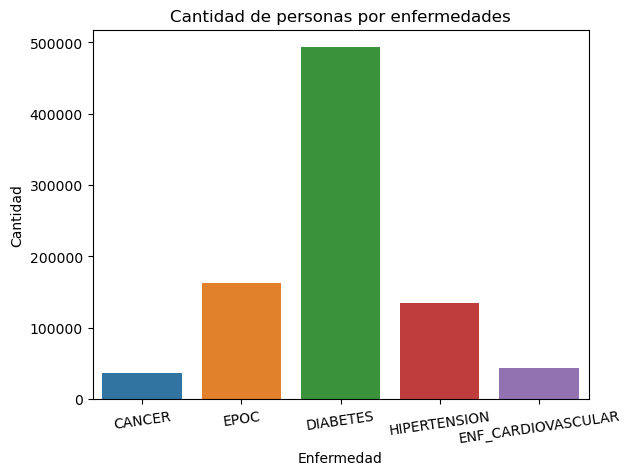

In [5]:
c1 = pd.DataFrame(df[['CANCER','EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR']].sum(), columns = ['Número de pacientes'])
c1 = c1.reset_index()
c1 = c1.rename(columns={'index':'Enfermedad'})
display(c1)
sns.barplot(c1, x='Enfermedad', y ='Número de pacientes')
plt.title('Cantidad de personas por enfermedades')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show()

**Reclamaciones**

,Reclamacion,Cantidad
9,CONSULTA EXTERNA,1437152
13,EXAMENES DE DIAGNOSTICO,790959
18,LABORATORIO CLINICO,592603
8,CONSULTA DE URGENCIAS,419581
4,CIRUGIA AMBULATORIA POR ENFERMEDAD,120737
15,FISIOTERAPIA ILIMITADA,112413
39,TRATAMIENTOS ESPECIFICOS,59241
26,TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES,44754
10,CONSULTAS PRENATALES,38696
31,TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD,32480


c:\Users\ESTEBAN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


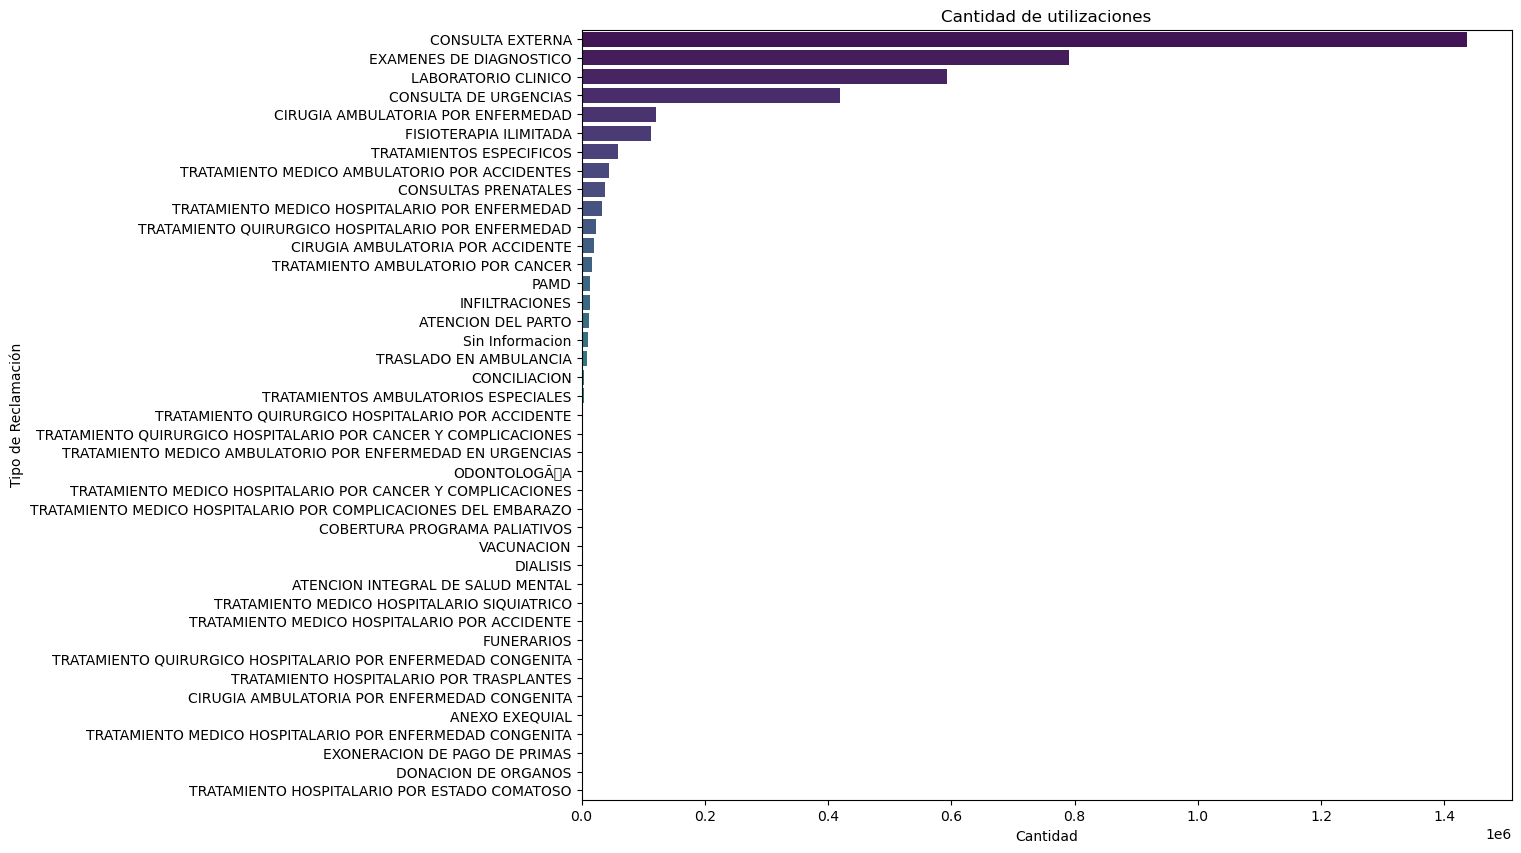

In [24]:
conteo_reclamaciones = df.groupby('Reclamacion').size().reset_index(name='Cantidad')
conteo_reclamaciones = conteo_reclamaciones.sort_values(by='Cantidad', ascending=False)
display(conteo_reclamaciones)

plt.figure(figsize=(12, 10))
sns.barplot(x='Cantidad', y='Reclamacion', data=conteo_reclamaciones, palette='viridis')
plt.title('Cantidad de utilizaciones')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Reclamación')
plt.show()

**Eventos por cada reclamación**

C:\Users\ESTEBAN\AppData\Local\Temp\ipykernel_8948\1608972843.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Eventos'], shade=True, color='skyblue')
c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


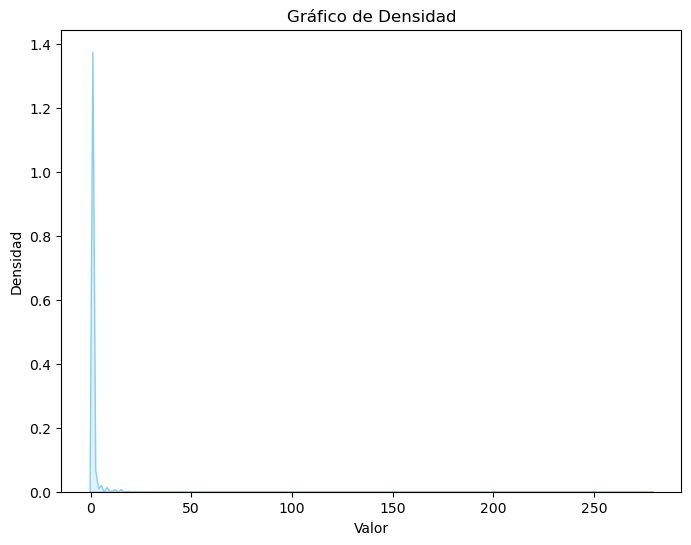

In [26]:
plt.figure(figsize=(8, 6))

# Crear gráfico de densidad usando seaborn
sns.kdeplot(df['Eventos'], shade=True, color='skyblue')

# Añadir título y etiquetas
plt.title('Gráfico de Densidad')
plt.xlabel('Valor')
plt.ylabel('Densidad')

# Mostrar el gráfico de densidad
plt.show()

**Distribución de Valor Pagado**

C:\Users\ESTEBAN\AppData\Local\Temp\ipykernel_8948\3933719316.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Valor_Pagado'], shade=True, color='skyblue')
c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


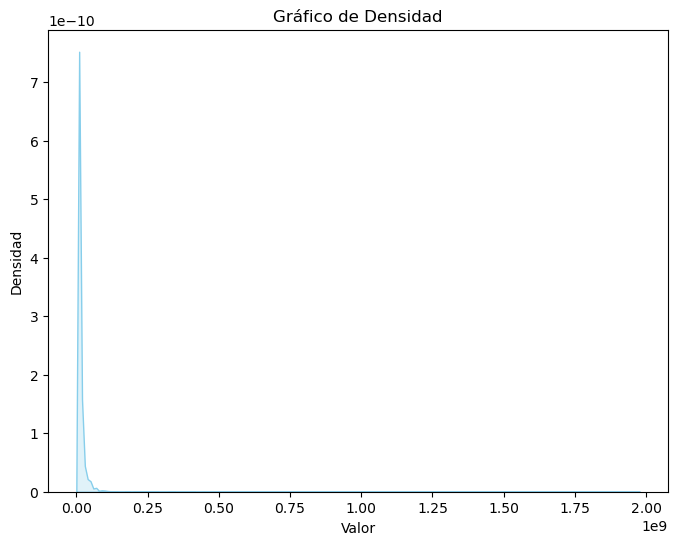

In [27]:
plt.figure(figsize=(8, 6))

# Crear gráfico de densidad usando seaborn
sns.kdeplot(df['Valor_Pagado'], shade=True, color='skyblue')

# Añadir título y etiquetas
plt.title('Gráfico de Densidad')
plt.xlabel('Valor')
plt.ylabel('Densidad')

# Mostrar el gráfico de densidad
plt.show()

**Distribución de la edad de los asegurados**

c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ESTEBAN\AppData\Local\Temp\ipykernel_8948\3351608464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Edad'], shade=True, color='skyblue', ax=axs[1])
c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


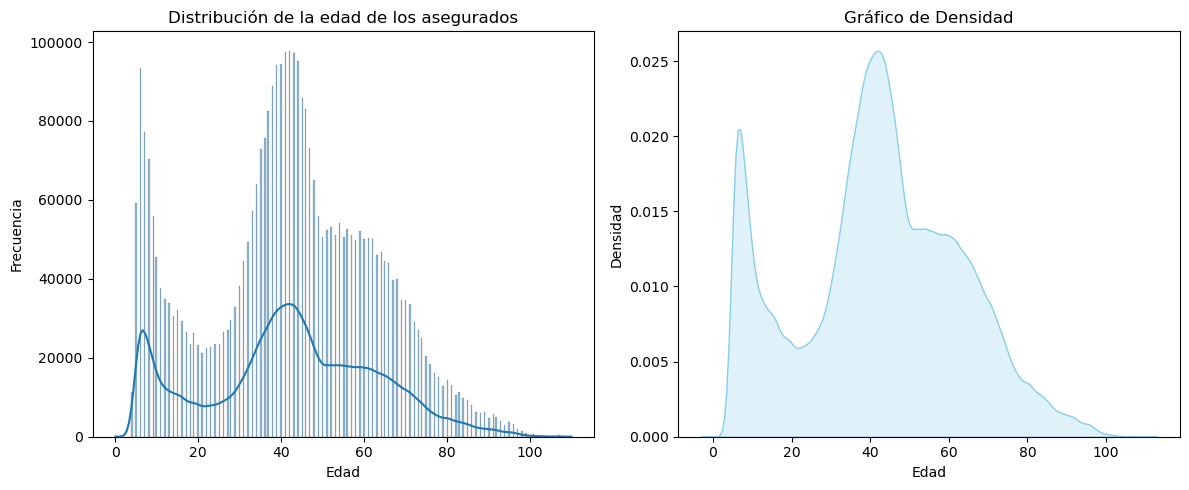

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graficar el histograma 
sns.histplot(df['Edad'], kde=True, ax=axs[0])  
axs[0].set_title('Distribución de la edad de los asegurados')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Frecuencia')

# Graficar el gráfico de densidad 
sns.kdeplot(df['Edad'], shade=True, color='skyblue', ax=axs[1])
axs[1].set_title('Gráfico de Densidad')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Densidad')

# Ajustar automáticamente los espacios entre los subgráficos para que no haya superposiciones
plt.tight_layout()

# Mostrar la figura con ambos gráficos
plt.show()

**Distribución de la duración de la póliza**

c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


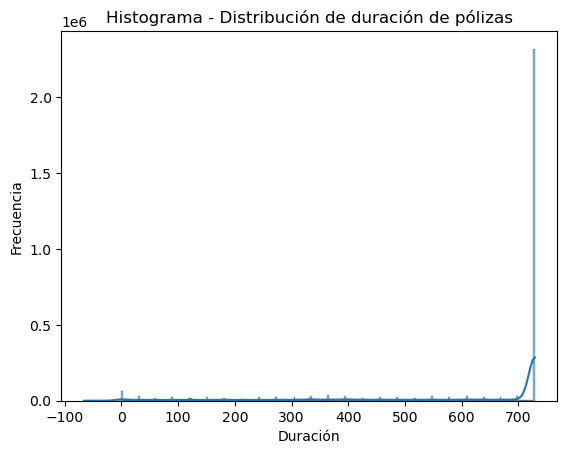

In [35]:
# Graficar el histograma 
sns.histplot(df['Duracion_Poliza_Dias'], kde=True)  
plt.title('Histograma - Distribución de duración de pólizas')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')

# Mostrar el gráfico de densidad
plt.show()

Observamos que hay algunas duraciones de pólizas menores a 0 días. Esto indica que en la columna FECHA_CANCELACION hay una fecha anterior a FECHA_INICIO. Esto claramente es un error en la digitación de los datos por lo cual debemos tomar una decisión con respecto a qué hacer con estos registros. 

In [37]:
df.loc[df['Duracion_Poliza_Dias']<0].head()

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico,Numero_Comorbilidades
304886,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,1,403623.960642,11,-19,Diagnostico Pendiente,0.0
304889,55027756,0,Cartagena,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,415363.784642,11,-19,Diagnostico Pendiente,0.0
304892,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,2,455572.681842,11,-19,Diagnostico Pendiente,0.0
304895,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,1,435174.737642,11,-19,Diagnostico Pendiente,0.0
304898,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,1,435174.737642,11,-19,Diagnostico Pendiente,0.0


**Diagnósticos**

,Clasificacion_Diagnostico,Cantidad
2,Diagnostico Pendiente,3129700
15,Factores que influyen en el estado de salud (S...,201255
16,Lesiones traumaticas,51684
19,Pruebas complementarias,50499
21,nan,50196
18,Neoplasias,43964
12,Enfermedades digestivas,41637
7,Enfermedades del aparato genitourinario,33516
14,Enfermedades respiratorias,26944
6,Enfermedades del aparato circulatorio,26144


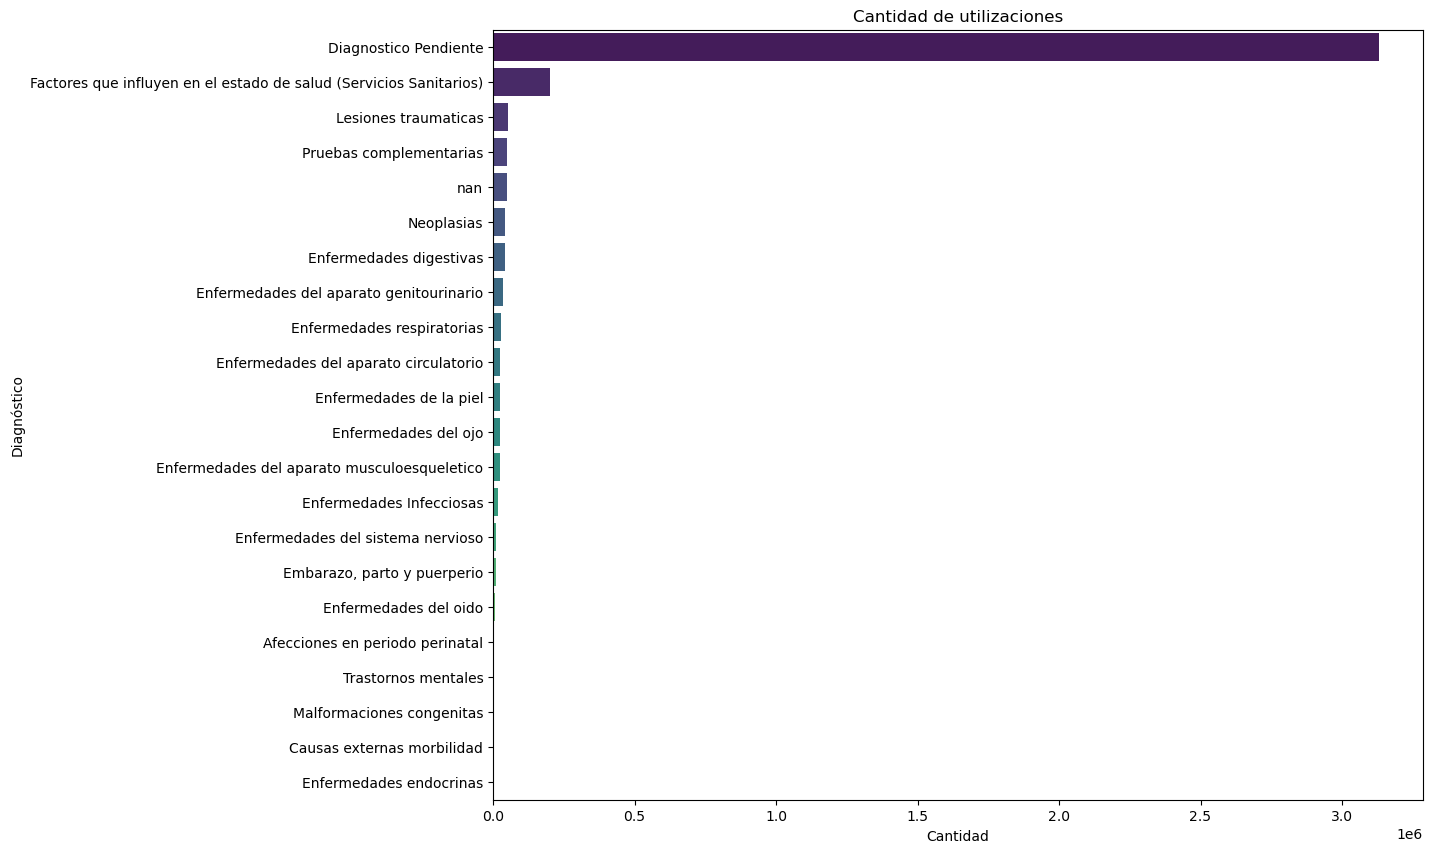

In [39]:
conteo_diagnosticos = df.groupby('Clasificacion_Diagnostico').size().reset_index(name='Cantidad')
conteo_diagnosticos = conteo_diagnosticos.sort_values(by='Cantidad', ascending=False)
display(conteo_diagnosticos)

plt.figure(figsize=(12, 10))
sns.barplot(x='Cantidad', y='Clasificacion_Diagnostico', data=conteo_diagnosticos, palette='viridis')
plt.title('Cantidad de utilizaciones')
plt.xlabel('Cantidad')
plt.ylabel('Diagnóstico')
plt.show()

**Número de comorbilidades**

,Numero_Comorbilidades,Cantidad
0,0.0,3115912
1,1.0,497631
2,2.0,134285
3,3.0,28352
4,4.0,5151


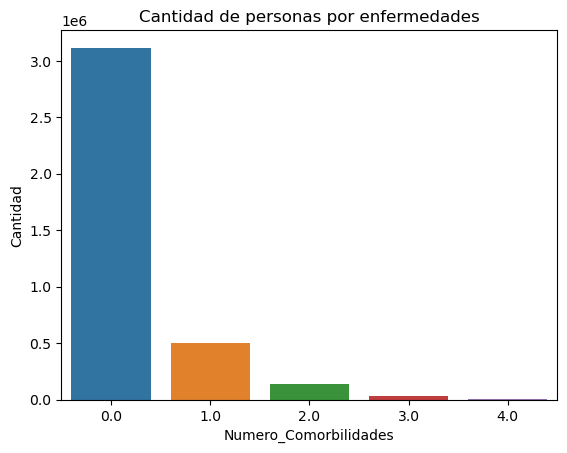

In [44]:
conteo_morbilidades= df.groupby('Numero_Comorbilidades').size().reset_index(name='Cantidad')
conteo_morbilidades = conteo_morbilidades.sort_values(by='Cantidad', ascending=False)
display(conteo_morbilidades)

sns.barplot(conteo_morbilidades, x='Numero_Comorbilidades', y ='Cantidad')
plt.title('Cantidad de personas por enfermedades')
plt.ylabel('Cantidad')
plt.show()

In [6]:
# Lista de variables binarias
variables = ['CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Sexo', 'Ciudad']

# Crear un gráfico de torta para cada variable
for variable in variables:
    # Contar el número de ocurrencias de cada categoría en la variable
    attrition_counts = df[variable].value_counts()
    
    # Crear el gráfico de torta con la paleta de colores personalizada
    fig = px.pie(values=attrition_counts, 
                 names=attrition_counts.index, 
                 title=f'Distribución de {variable}')
    fig.show()

## Análisis bivariado ##

,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
Costos totales,4.812181e+10,2.700052e+11,4.578205e+11,1.294142e+11,5.606105e+10


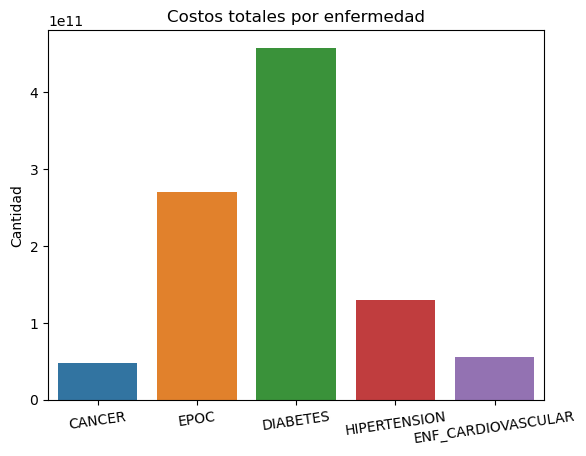

In [47]:
costos_cancer = df.loc[df['CANCER'] == 1]
costos_cancer = costos_cancer[['CANCER','Valor_Pagado']]

costos_epoc = df.loc[df['EPOC'] == 1]
costos_epoc = costos_epoc[['EPOC','Valor_Pagado']]

costos_diabetes = df.loc[df['DIABETES'] == 1]
costos_diabetes = costos_diabetes[['DIABETES','Valor_Pagado']]

costos_hipertension = df.loc[df['HIPERTENSION'] == 1]
costos_hipertension = costos_hipertension[['HIPERTENSION','Valor_Pagado']]

costos_cardiovascular = df.loc[df['ENF_CARDIOVASCULAR'] == 1]
costos_cardiovascular = costos_cardiovascular[['ENF_CARDIOVASCULAR','Valor_Pagado']]

costos_totales = {'CANCER':costos_cancer['Valor_Pagado'].sum(),
                 'EPOC': costos_epoc['Valor_Pagado'].sum(), 
                 'DIABETES': costos_diabetes['Valor_Pagado'].sum(), 
                 'HIPERTENSION': costos_hipertension['Valor_Pagado'].sum(), 
                 'ENF_CARDIOVASCULAR': costos_cardiovascular['Valor_Pagado'].sum()}

df_costos = pd.DataFrame(costos_totales, index=['Costos totales'])
display(df_costos)

sns.barplot(df_costos)
plt.title('Costos totales por enfermedad')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show()


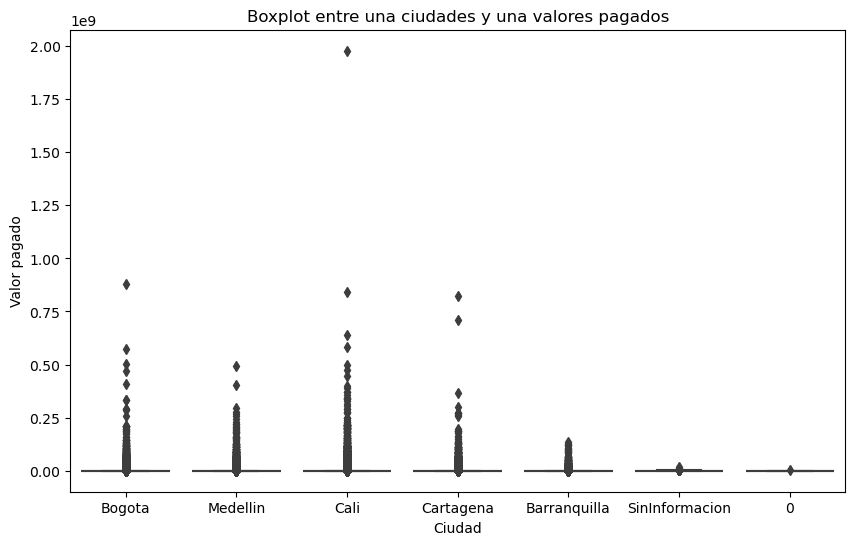

In [50]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Ciudad', y='Valor_Pagado', data=df)

# Añadir título y etiquetas
plt.title('Boxplot entre una ciudades y una valores pagados')
plt.xlabel('Ciudad')
plt.ylabel('Valor pagado')

# Mostrar el gráfico
plt.show()

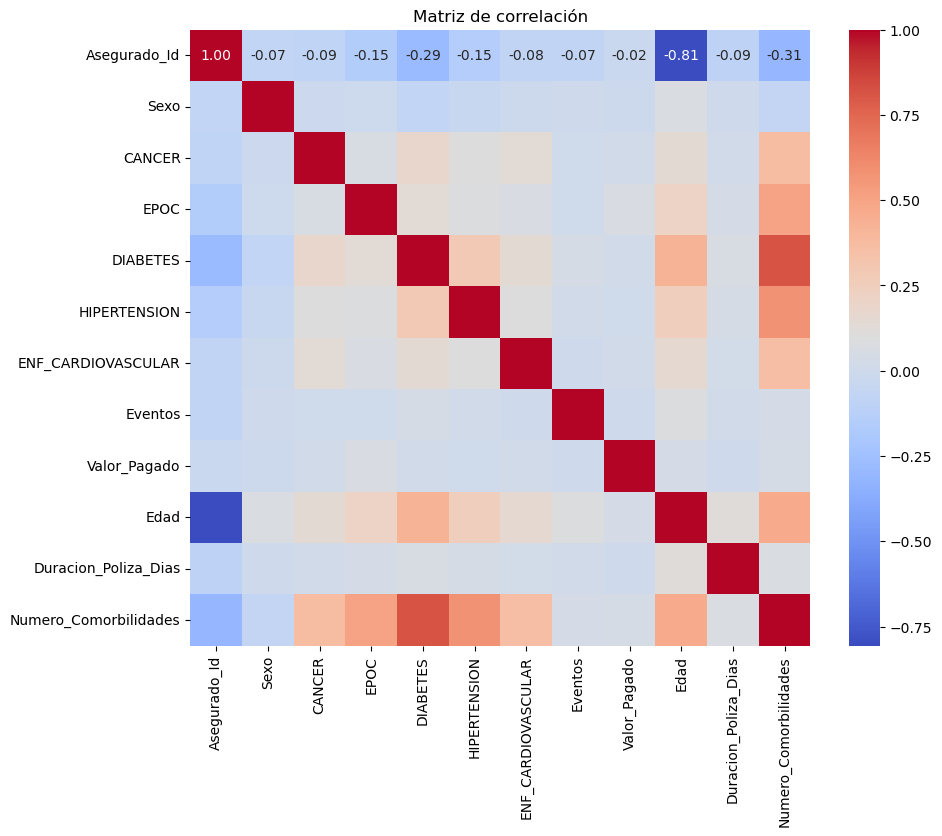

In [52]:
df_numeric = df.select_dtypes(include='number')

# Generar matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añadir título
plt.title('Matriz de correlación')

# Mostrar el gráfico
plt.show()